In [21]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded =files.upload()
textfile = list(uploaded.keys())[0]

Saving 망막박리.txt to 망막박리 (1).txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving 눈.jpeg to 눈 (1).jpeg


## 1. 텍스트 전처리

In [4]:
with open(textfile) as fp:
  text= fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['망막박리', '무슨', '질환', '요', '망막박리', '란', '무엇', '망막', '우리', '눈']

In [7]:
# 영문자, 숫자 제거
import re
new_tokens = [ ]
for token in tokens:
  item = re.sub('[A-Za-z0-9]', '', token)
  if item:
    new_tokens.append(item)

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [9]:
import nltk
nltk.download('punk')
nltk.download('stopwords')

[nltk_data] Error loading punk: Package 'punk' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

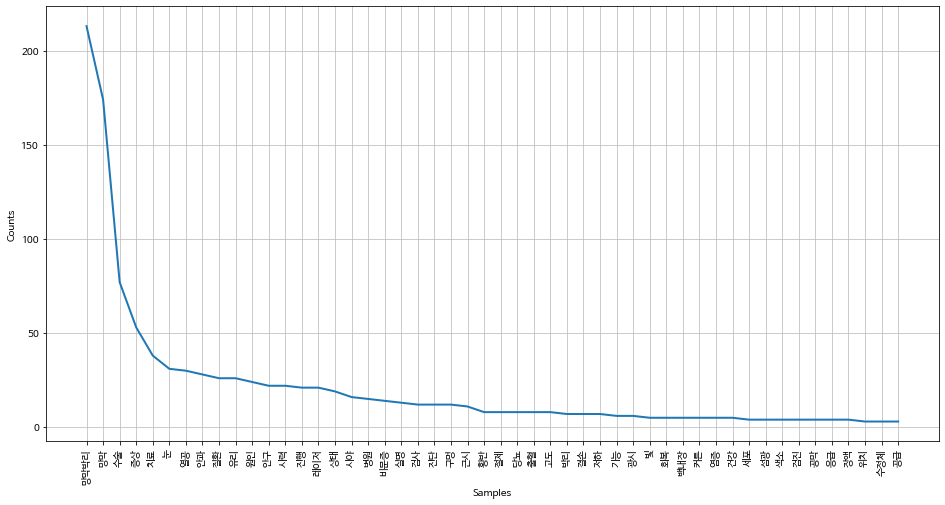

In [39]:
eye = nltk.Text(new_tokens, name='망막박리')
plt.figure(figsize=(16,8))
eye.plot(50)
plt.show()

In [45]:
stoptext = """
  수 전 것 경우 제 후 박 벅 리가 말 술 층 방법 요 등 정도 통해 때문 증 이
  벽 때 란 부 부위 주변 아래 병증 진료 막 가능 그 및 체 방치 가능 점 일부 대해
  문제 현상 안 부분 눈앞 더 갑자기 물이 가장 교수 다시 시간 점점 분리 부터
  오늘 후기 시 정상 주의 견인 다른 여러 형태 범위 기간 의심 가지 발생
  신분 동네 점차 안경 끗 공간 발견 침범 지속 끗 외상 위 나 꿋 라섹 서울
  곳 우리 안쪽 기관 감지 공급 위치 조물 무슨 무엇 통과
"""

stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if  word not in stop_words]
new_tokens[:10]

['망막박리', '질환', '망막박리', '망막', '눈', '신경세포', '망막', '각막', '수정체', '빛']

### 2. 워드클라우드 그리기

In [46]:
from wordcloud import WordCloud
from PIL import Image

In [47]:
data = eye.vocab().most_common(400)
path ='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path = path, relative_scaling = 0.2,
    background_color= 'white'
).generate_from_frequencies(dict(data))

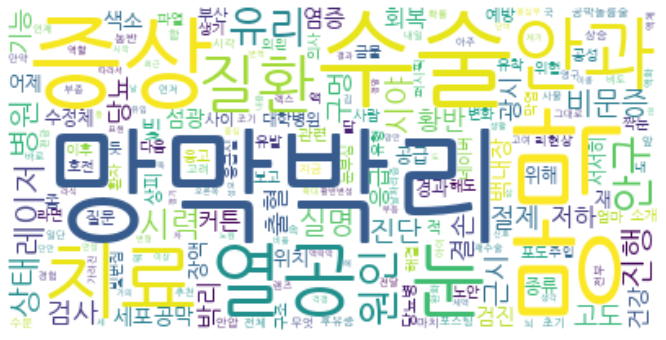

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. 사진위에 워드클라우드 생성

In [51]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

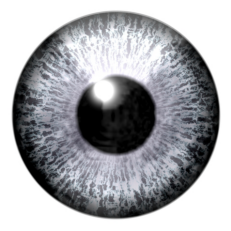

In [52]:
plt.imshow(mask,interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
wc = WordCloud(
    font_path = path, relative_scaling = 0.2,
    background_color= 'white', mask = mask,
    min_font_size = 3, max_font_size=120
).generate_from_frequencies(dict(data))

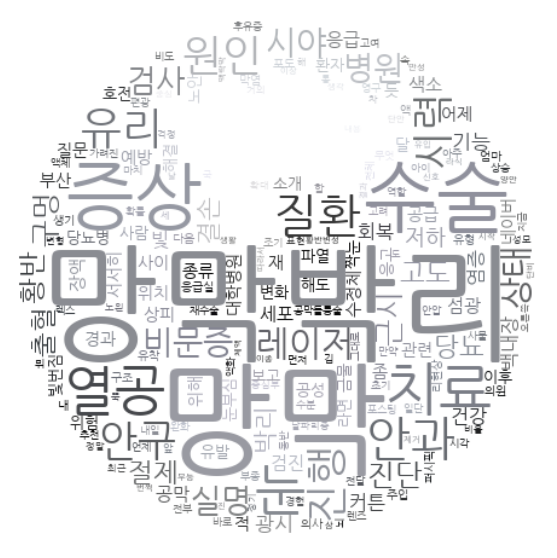

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),
           interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('망막박리.png')